In [6]:
from dotenv import load_dotenv
load_dotenv()

import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

client_credentials_manager = SpotifyClientCredentials(
    client_id="1fe61b84238e4a7190ec737ef2fafd78",
    client_secret="9865dfe06f884cb39a9ac0d4202218b2")
    

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

artist_id = "6M2wZ9GZgrQXHCFfjv46we"

try:
    response = sp.artist_top_tracks(artist_id, country='US') 
    print("Top Tracks:")
    for track in response['tracks']:
        print(f"Track: {track['name']}, Popularidad: {track['popularity']}")
except Exception as e:
    print(f"Error: {e}")


Top Tracks:
Track: Handlebars (feat. Dua Lipa), Popularidad: 85
Track: Cold Heart - PNAU Remix, Popularidad: 68
Track: Training Season, Popularidad: 81
Track: Don't Start Now, Popularidad: 82
Track: Houdini, Popularidad: 84
Track: Dance The Night - From Barbie The Album, Popularidad: 82
Track: One Kiss (with Dua Lipa), Popularidad: 76
Track: Levitating (feat. DaBaby), Popularidad: 80
Track: New Rules, Popularidad: 79
Track: IDGAF, Popularidad: 77


In [34]:
import pandas as pd

tracks = response['tracks']

data = []
for track in tracks:
    data.append({
        'Name': track['name'],  # Nombre de la canción
        'Popularity': track['popularity'],  # Popularidad
        'Preview_URL': track['preview_url'],  # Enlace de previsualización
        'Duration_ms': track['duration_ms'],  # Duración en milisegundos
        'Album': track['album']['name'],  # Álbum al que pertenece
    })

# Convertimos a DataFrame
df = pd.DataFrame(data)

# Mostramos el DataFrame
print(df)

                                      Name  Popularity Preview_URL  \
0              Handlebars (feat. Dua Lipa)          85        None   
1                  Cold Heart - PNAU Remix          68        None   
2                          Training Season          81        None   
3                          Don't Start Now          82        None   
4                                  Houdini          84        None   
5  Dance The Night - From Barbie The Album          82        None   
6                 One Kiss (with Dua Lipa)          76        None   
7                Levitating (feat. DaBaby)          80        None   
8                                New Rules          79        None   
9                                    IDGAF          77        None   

   Duration_ms                                    Album  
0       184698                                     Ruby  
1       202735                    The Lockdown Sessions  
2       209487                         Radical Optimism

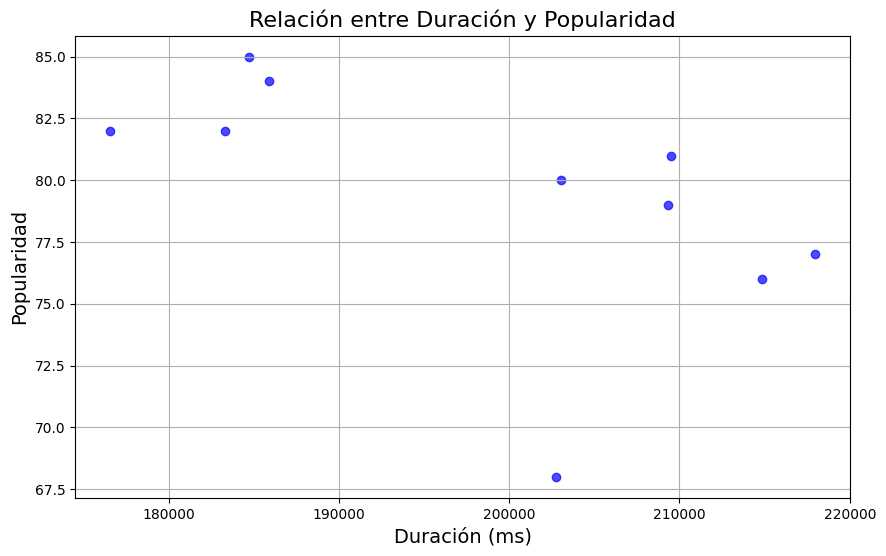

In [36]:
import matplotlib.pyplot as plt

# Creamos el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration_ms'], df['Popularity'], color='blue', alpha=0.7)

plt.title('Relación entre Duración y Popularidad', fontsize=16)
plt.xlabel('Duración (ms)', fontsize=14)
plt.ylabel('Popularidad', fontsize=14)
plt.grid(True)

plt.show()